# Business Understanding
Grocery stores handle large quantities of fruits every day. It's important that they are able to catagorize them and determine whether they are fresh or rotten. That's where this dataset come in. The dataset we chose is a collection of images of strawberries, peaches, and pomegranates. The images are classified as either fresh or rotten and as strawberry, peach, or pomegranete. This model could be used by grocery stores to help them catagorize their fruits and determine which ones are fresh and which ones are rotten which could help them reduce waste and increase profits. It could also be used in farming to help determine at a large scale which fruits are fresh and able to be sold, and which are rotten, and can be used for other purposes, making sure that the two do not accidentally get mixed together. This model can be used to identify the freshness of the fruit and can be handled accordingly. This data is important because of certain regulations and standards set by grocery stores and restaurants, it is crucial to not sell or serve rotten food as that would lead to serious health concerns. To be used used by these third-parties, we believe that it should be able to reliable be able to distinguish between rotten and fresh fruits for the fruits included in the data set, otherwise the error would be to great and would not be of any commercial use to these companies. For example, if a shipment of pomegranites, strawberries, and peaches arrive to a restaurant, and 90% were fresh, and somehow the chef did not notice and accidentally prepared a dish with rotten fruit, that would mean that one in ten people are at risk.

# Data Understanding
Each image is a .jpg with a white background and an image size of 300*300. The classifications are stored in the file names. We did some reorganizing of the files into different folders to make it easier to read in. After loading the images, we first do some preprocessing to each image including resizing the images and then flattening th images. Finally we store the classification information in a target array.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Classifcation categories
fruits = ['peach', 'pomegranate', 'strawberry']
fruit_type = ['fresh', 'rotten']

# Set the image size
h, w = 50, 50

# Load the image data
data_set = [] # Image data
dataset_target = [] # Target information, [fresh/rotten, fruit type]

for fruit in fruits:
    for ft in fruit_type:
        # Open the directory
        path = f'./data/{ft}/{fruit}'

        # Load the image data
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))

            # Set color to RGB
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

            # Resize the image
            img_array = cv2.resize(img_array, (h, w))

            # Flatten the image
            img_array = img_array.flatten()
            data_set.append(img_array)

            # Add the target information
            dataset_target.append(list([ft, fruit]))


print(f'Loaded {len(data_set)} images')
print(f'{data_set[0].shape[0]} features per image')

Loaded 1655 images
7500 features per image


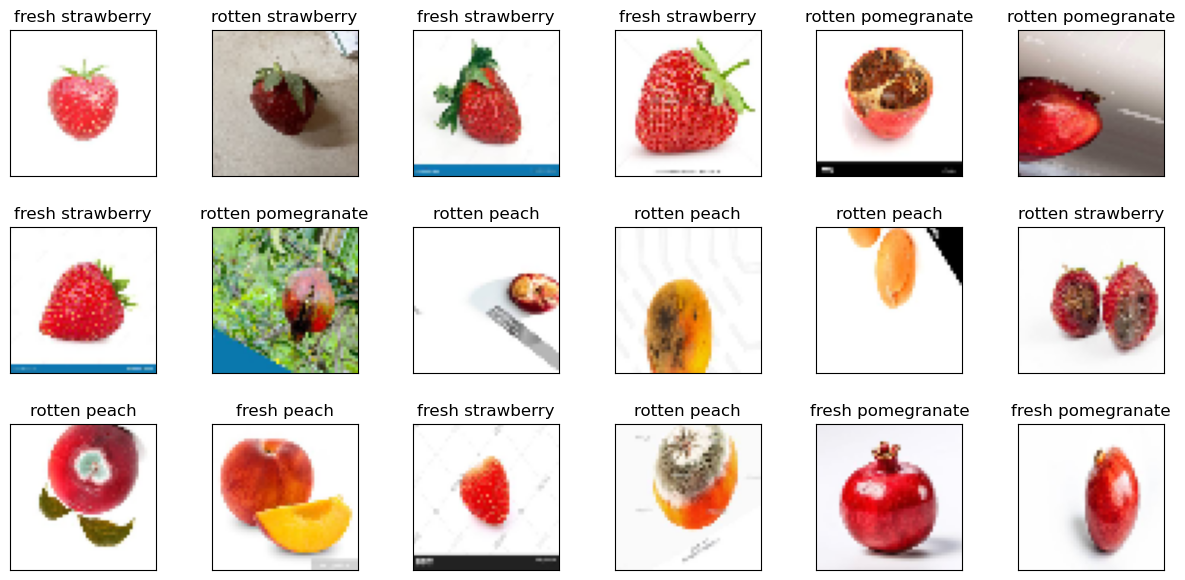

In [3]:
import random

def plot_rand_gallery(images, titles, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    plot_index=random.sample(range(0,len(data_set)),n_row * n_col)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[plot_index[i]].reshape((h, w, 3)))
        title = titles[plot_index[i]][0] + " " + titles[plot_index[i]][1]
        plt.title(title, size=12)
        plt.xticks(())
        plt.yticks(())

plot_rand_gallery(data_set, dataset_target, h, w)

# PCA

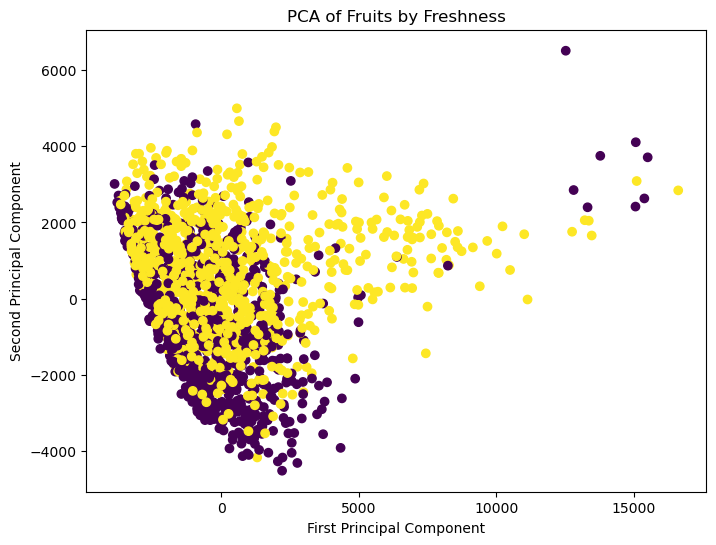

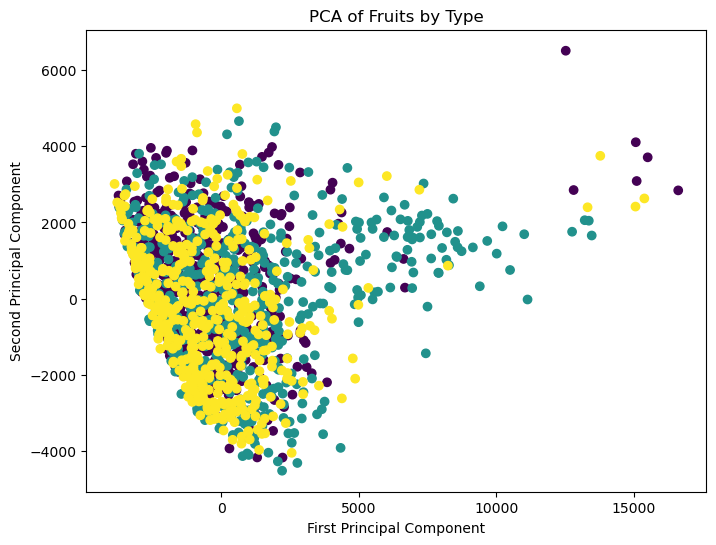

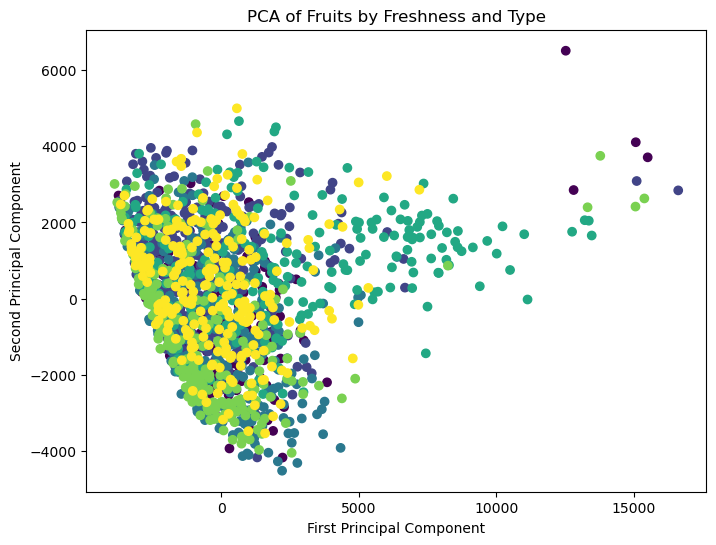

In [4]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
 
# Perform PCA
pca = PCA(n_components=2)
data_set_pca = pca.fit_transform(data_set)

# Plot the PCA
plt.figure(figsize=(8, 6))  
plt.scatter(data_set_pca[:, 0], data_set_pca[:, 1], c=[0 if x[0] == 'fresh' else 1 for x in dataset_target])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.title('PCA of Fruits by Freshness')

plt.show()

# PCA of fruits by type
plt.figure(figsize=(8, 6))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.scatter(data_set_pca[:, 0], data_set_pca[:, 1], c=[0 if x[1] == 'peach' else 1 if x[1] == 'pomegranate' else 2 for x in dataset_target])

plt.title('PCA of Fruits by Type')

plt.show()

# PCA of fruits by freshness and type
plt.figure(figsize=(8, 6))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.scatter(data_set_pca[:, 0], 
            data_set_pca[:, 1],
            c=[0 if x[0] == 'fresh' and x[1] == 'peach' else 1 if x[0] == 'rotten' and x[1] == 'peach' else 2 if x[0] == 'fresh' and x[1] == 'pomegranate' else 3 if x[0] == 'rotten' and x[1] == 'pomegranate' else 4 if x[0] == 'fresh' and x[1] == 'strawberry' else 5 for x in dataset_target])

plt.title('PCA of Fruits by Freshness and Type')
plt.show()



We initially tried to use PCA to try to reduce the dimensionality of the the images by using only 2 dimensions. However, we found that the images were not well suited for 2 dimensional PCA. Plotted above are the graphs showing different coloring of the images based on the different classifications. We can see that the images are not well separated and that 2-dimensional PCA is not a good way to reduce the dimensionality of the images. This led us to try to increase the number of dimensions to 3 which is shown in the next section.

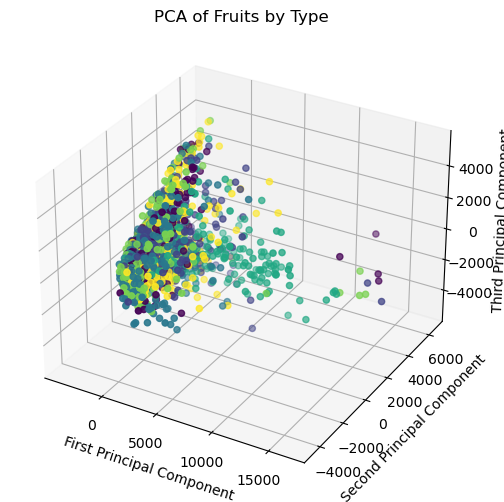

In [5]:
# PCA with 3 components
pca = PCA(n_components=3)
pca.fit(data_set)
data_set_pca = pca.transform(data_set)

# Plot the PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_set_pca[:, 0], 
           data_set_pca[:, 1], 
           data_set_pca[:, 2], 
           c=[0 if x[0] == 'fresh' and x[1] == 'peach' else 1 if x[0] == 'rotten' and x[1] == 'peach' else 2 if x[0] == 'fresh' and x[1] == 'pomegranate' else 3 if x[0] == 'rotten' and x[1] == 'pomegranate' else 4 if x[0] == 'fresh' and x[1] == 'strawberry' else 5 for x in dataset_target])


ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.title('PCA of Fruits by Type')

plt.show()


We can see a little bit of seperation between some of the classes but it is not enough to be useful for our purposes. Our next thought was to try to reduce the number of classes to see if that would help (for instance only comparing pomegranates and strawberries) which is shown in the next section.

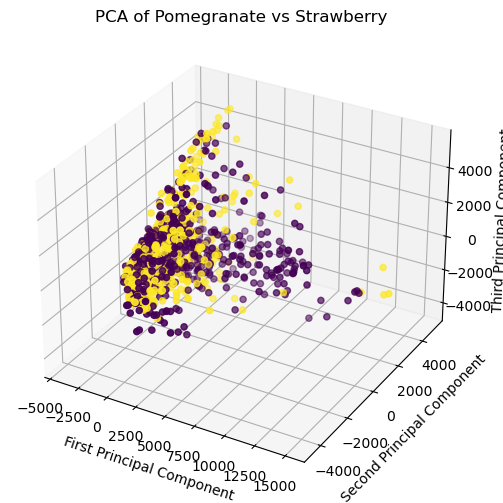

In [6]:
# PCA between pomegranate and strawberry only
pomegranate_strawberry = [x for x in dataset_target if x[1] in ['pomegranate', 'strawberry']]
pomegranate_strawberry_data = [data_set[i] for i, x in enumerate(dataset_target) if x[1] in ['pomegranate', 'strawberry']]
pca = PCA(n_components=3)
pca.fit(pomegranate_strawberry_data)
pomegranate_strawberry_data_pca = pca.transform(pomegranate_strawberry_data)

# Plot the PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pomegranate_strawberry_data_pca[:, 0], pomegranate_strawberry_data_pca[:, 1], pomegranate_strawberry_data_pca[:, 2], c=[0 if x[1] == 'pomegranate' else 1 for x in pomegranate_strawberry])

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.title('PCA of Pomegranate vs Strawberry')

plt.show()

As can be seen, we still were unable to get any useful information from 

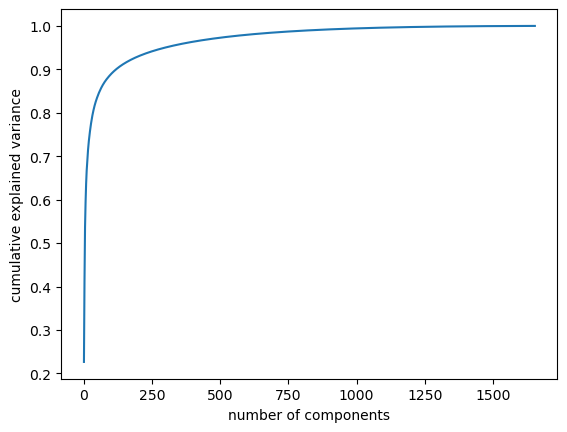

Number of components to explain 80% of the variance: 34


In [7]:
# Determine the number of components to use
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
pca = PCA().fit(data_set)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

# Get the number of components that explain 80% of the variance
pca = PCA(0.80)
pca.fit(data_set)
print(f'Number of components to explain 80% of the variance: {pca.n_components_}')

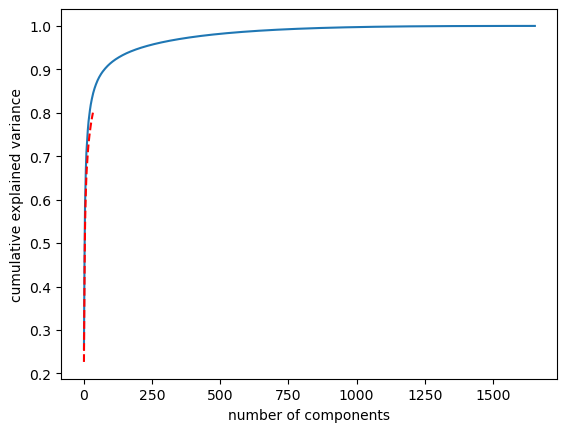

Number of components to explain 80% of the variance: 22


In [8]:
# Covert images to grayscale
data_set_gray = [cv2.cvtColor(x.reshape((h, w, 3)), cv2.COLOR_RGB2GRAY).flatten() for x in data_set]

# Compare the number of components to use
pca_grayscale = PCA().fit(data_set_gray)
plt.plot(np.cumsum(pca_grayscale.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

# Get the number of components that explain 80% of the variance
pca_grayscale = PCA(0.80)
pca_grayscale.fit(data_set_gray)
print(f'Number of components to explain 80% of the variance: {pca_grayscale.n_components_}')



## Feature Extraction using DAISY

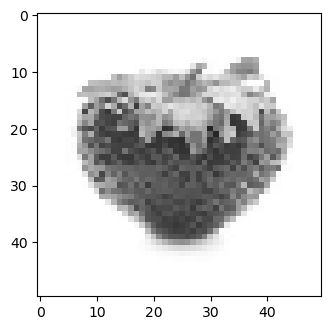

In [54]:
from skimage.io import imshow

#Selecting an image to visualize the DAISY descriptor 
plt.subplot(1,2,1)
idx_to_reconstruct = int(np.random.rand(1)*len(data_set))
img  = data_set_gray[idx_to_reconstruct].reshape(50,50)
imshow(img)
plt.grid(False)

We will be applying the DAISY function to images like the above. Below, we will visualize the DAISY descriptor from the image above.

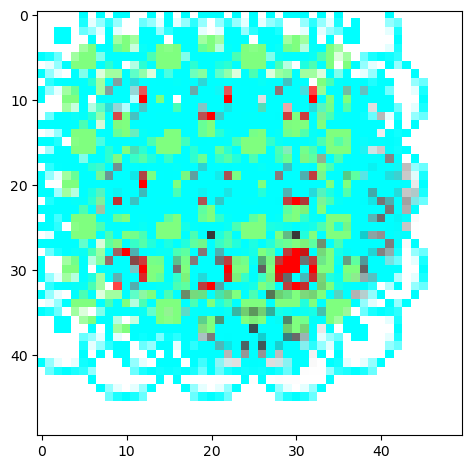

In [55]:
#Visualizing what the descriptor looks like
from skimage.feature import daisy

features, img_desc = daisy(img, 
                            step=10, 
                           radius=10, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)
plt.show()

Here, we are visualizing the application of the DAISY function onto the image randomly selected above. Now, we are going to apply the DAISY function to all of the images to extract features from the images. First, we will attempt to find the image closest matching the one selected using the DAISY features that we extracted. Then we will attempt to measure how accurate the DAISY function is at classifying fruit type and freshness by running a k-nearest-neighbor on the DAISY-applied data set.

In [38]:
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=10, radius=10, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    return feat.reshape((-1))

daisy_features = np.apply_along_axis(apply_daisy, 1, data_set_gray, (h,w))

In [59]:
from sklearn.metrics.pairwise import pairwise_distances
import copy

def find_closest_image(data_set_gray, dataset_target, daisy_features, idx_to_reconstruct):
    dist_matrix = pairwise_distances(daisy_features)
    idx1 = idx_to_reconstruct
    distances = copy.deepcopy(dist_matrix[idx1,:])
    distances[idx1] = np.infty 
    idx2 = np.argmin(distances)

    plt.figure(figsize=(7,10))
    plt.subplot(1,2,1)
    imshow(data_set_gray[idx1].reshape((h,w)))
    label1 = " ".join(dataset_target[idx1])
    plt.title("Original Image: "+ label1)
    plt.grid()

    plt.subplot(1,2,2)
    imshow(data_set_gray[idx2].reshape((h,w)))
    label2 = " ".join(dataset_target[idx2])
    plt.title("Closest Image: " + label2)
    plt.grid()

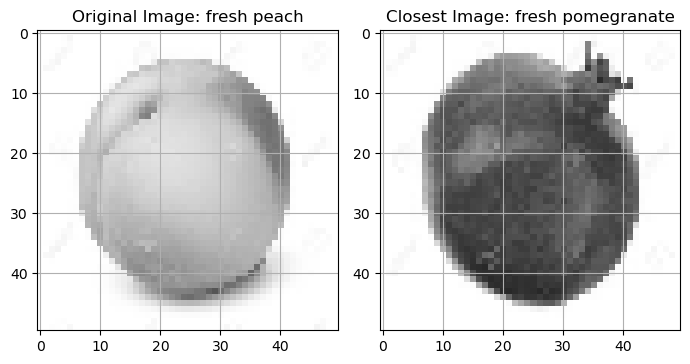

In [61]:
idx_to_reconstruct = int(np.random.rand(1)*len(data_set))

find_closest_image(data_set_gray, dataset_target, daisy_features, idx_to_reconstruct)

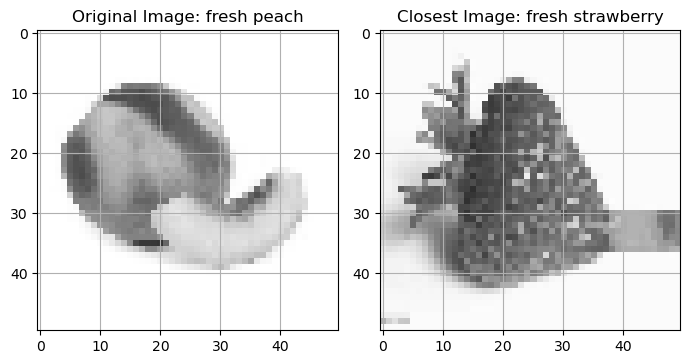

In [64]:
idx_to_reconstruct = int(np.random.rand(1)*len(data_set))

find_closest_image(data_set_gray, dataset_target, daisy_features, idx_to_reconstruct)

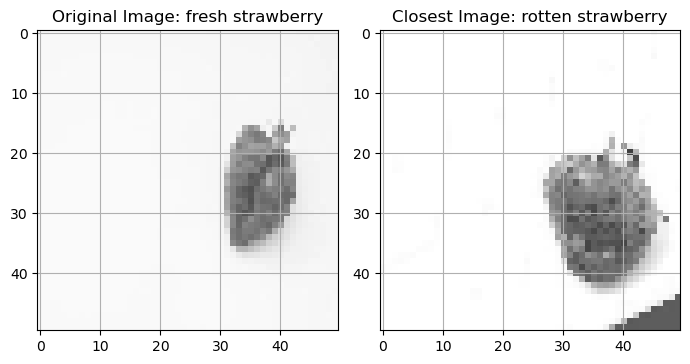

In [62]:
idx_to_reconstruct = int(np.random.rand(1)*len(data_set))

find_closest_image(data_set_gray, dataset_target, daisy_features, idx_to_reconstruct)

While the DAISY function struggles to consistently match a correct label, it does capture the general shape quite accurately. In all of our visualizations, the matched fruit is located roughly in same grid as the originally selected fruit. Therefore, DAISY seems to be quite effective at matching the position of extracted features at the very least. However, with poor label matching, particularly of the fruit freshness, in a business setting where it is important to determine if fruit has gone rotten, DAISY will likely not be the most effective choice at classifying fruits. We would be better off using a different feature extraction method. In our k-nearest-neigbor classifier, we will be testing to see that our 

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier

knn_dsy = KNeighborsClassifier(n_neighbors=3)
classifier_dsy = MultiOutputClassifier(knn_dsy, n_jobs=-1)

# separate the data into train/test
dsy_train, dsy_test, labels_train, labels_test = train_test_split(daisy_features, dataset_target, test_size=0.2, train_size=0.8)

# fit each classifier and calculate predicted values

classifier_dsy.fit(dsy_train,labels_train)

#Printing results
print("DAISY classifier score:", classifier_dsy.score(dsy_test, np.array(labels_test)))

DAISY classifier score: 0.4078549848942598


We used the MultiOutputClassifier as out target data has multiple labels for each data entry (freshness and fruit type). We then passed a KNN classifier as an argument into the MultiOutputClassifier and get results of roughly 40%

The results confirm our suspicion that DAISY is not the best method in order to classify our fruit type and freshness. With a consistent multi-class multi-output classifier score of about 40%, our accuracy is too low to ever justify the use of DAISY in a setting where an incorrect classification can get someone sick (by eating a rotten fruit). 

## Key Point Matching 

In [15]:
# for the exceptional credit, you might be interested in the following code
# you will need to repeat this for all pairs of images in the testing and training 
from skimage.feature import match_descriptors

def apply_daisy(row,shape): # no reshape in this function
    feat = daisy(row.reshape(shape), step=5, radius=5, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    s = feat.shape # PxQxR
    #P = ceil((Height - radius*2) / step) 
    #Q = ceil((Width - radius*2) / step) 
    #R = (rings * histograms + 1) * orientations
    return feat.reshape((s[0]*s[1],s[2]))

d1 = apply_daisy(X[10],(h,w))
d2 = apply_daisy(X[11],(h,w))
d3 = apply_daisy(X[0],(h,w))

print(d1.shape, d2.shape, d3.shape)
print('Classes:',y[10],y[11],y[0])

# return list of the key points indices that matched closely enough
matches = match_descriptors(d1, d2, cross_check=True, max_ratio=0.8)
print(f"Number of matches, same class: {matches.shape[0]}, Percentage:{100*matches.shape[0]/len(d1):0.2f}%")

# return list of the key points indices that matched closely enough
matches = match_descriptors(d1, d3, cross_check=True, max_ratio=0.8)
print(f"Number of matches, diff classes: {matches.shape[0]}, Percentage:{100*matches.shape[0]/len(d1):0.2f}%")

NameError: name 'X' is not defined

# Sources
- https://www.kaggle.com/datasets/alihasnainch/fruits-dataset-for-classification
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html